In [1]:
#wget https://cf.10xgenomics.com/samples/cell-atac/2.1.0/10k_pbmc_ATACv2_nextgem_Chromium_X/10k_pbmc_ATACv2_nextgem_Chromium_X_fragments.tsv.gz
#wget https://cf.10xgenomics.com/samples/cell-atac/2.1.0/10k_pbmc_ATACv2_nextgem_Chromium_X/10k_pbmc_ATACv2_nextgem_Chromium_X_fragments.tsv.gz.tbi
#wget https://cf.10xgenomics.com/samples/cell-atac/2.1.0/10k_pbmc_ATACv2_nextgem_Chromium_X/10k_pbmc_ATACv2_nextgem_Chromium_X_filtered_peak_bc_matrix.h5 

In [2]:
import scanpy as sc
adata=sc.read_10x_h5('/home/DAIR/hul/scATAC-seq/data/Epiverse_Data/10k_pbmc_ATACv2_nextgem_Chromium_X_filtered_peak_bc_matrix.h5',gex_only=False)
adata.uns['files']={'fragments': '/content/10k_pbmc_ATACv2_nextgem_Chromium_X_fragments.tsv.gz'}

In [3]:
import Epiverse
Epiverse.utils.download_gene_annotation_file(download_file='/home/DAIR/hul/scATAC-seq/data/Epiverse_Data')

......Gene Annotation File download start: chm13v2.0_RefSeq_Liftoff_v4
......Loading dataset from /home/DAIR/hul/scATAC-seq/data/Epiverse_Data/chm13v2.0_RefSeq_Liftoff_v4.gtf.gz
......Gene Annotation File download finished!


In [4]:
Epiverse.pp.cal_qc(adata = adata, 
                    fragments_file = '/home/DAIR/hul/scATAC-seq/data/Epiverse_Data/10k_pbmc_ATACv2_nextgem_Chromium_X_fragments.tsv.gz',
                    fragments_tbi_file = '/home/DAIR/hul/scATAC-seq/data/Epiverse_Data/10k_pbmc_ATACv2_nextgem_Chromium_X_fragments.tsv.gz.tbi',
                    Number_of_fragments_to_count = 1e3*adata.n_obs,
                    RefSeq_file = '/home/DAIR/hul/scATAC-seq/data/Epiverse_Data/chm13v2.0_RefSeq_Liftoff_v4.gtf.gz')

......Calculate QC metrics
......Log-transform total counts
......Calculate the nucleosome signal across cells


Reading Fragments: 100%|██████████| 10273000/10273000 [00:46<00:00, 223087.62it/s]


......Process the gene annotation file
......Calculate the TSS enrichment score


Fetching Regions...: 100%|██████████| 2998/2998 [00:08<00:00, 341.79it/s]


......Calculate QC metrics successfully


AnnData object with n_obs × n_vars = 10273 × 164487
    obs: 'n_features_per_cell', 'total_fragment_counts', 'log_total_fragment_counts', 'nucleosome_signal', 'tss_score'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'files'

......Plot QC metrics
......Plot the distribution of the TSS score


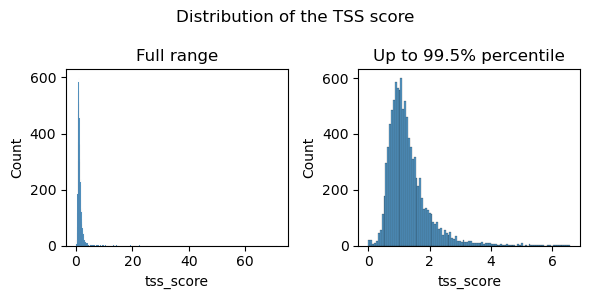

......Plot Violin plots of nucleosome signal and TSS score.


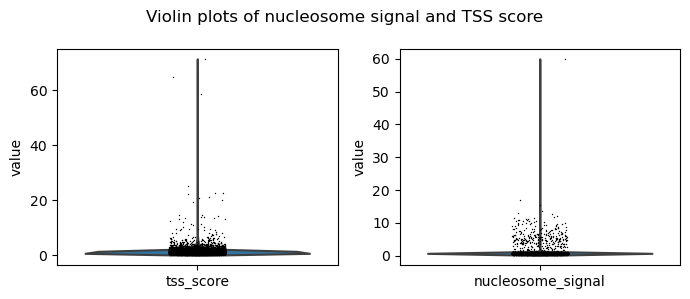

......Plot Density plots of log_total_fragment_counts and tss_score.


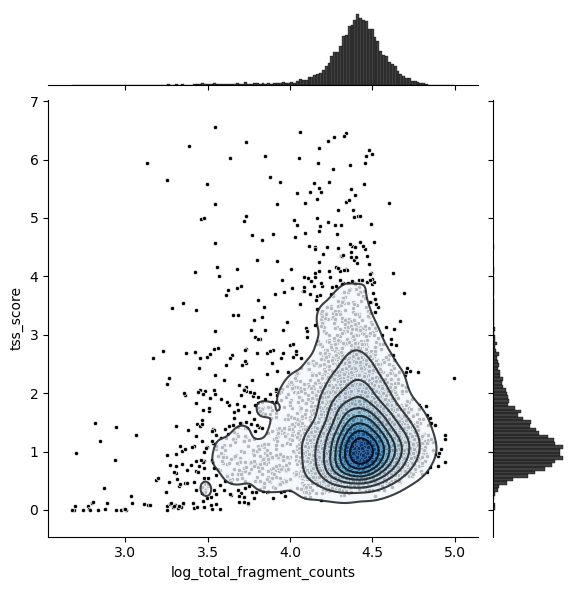

......Plot Scatter plot total fragment count by number of features in low counts.


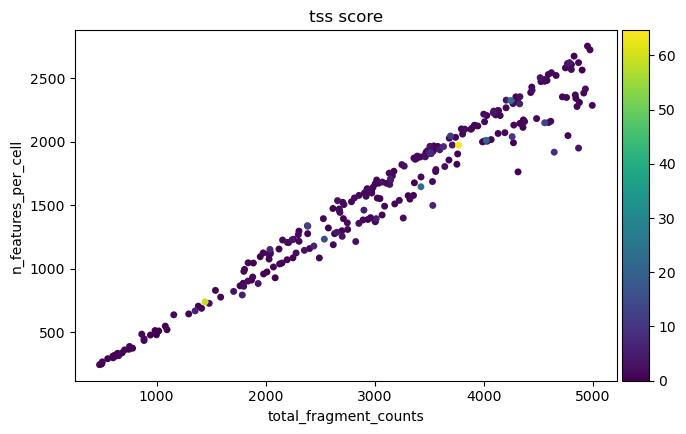

......Plot total counts of fragments & features colored by TSS score.


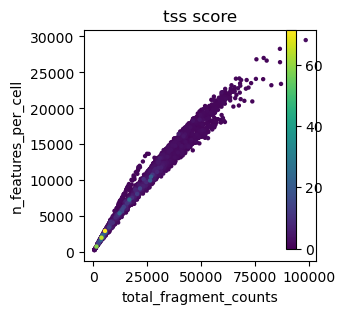

In [5]:
Epiverse.pp.plot_qc(adata = adata,
                    save = True,
                    save_dir = '/home/DAIR/hul/scATAC-seq/data/Epiverse_Data/Figures',)

In [6]:
adata = Epiverse.pp.filter_qc(adata, 
                tresh={'fragment_counts_min': 2000,
                'fragment_counts_max': 100000,
                'features_per_cell_min': 1000, # There is a nearly linear relationship of the total fragment count with the number of features per cell.
                'TSS_score_min': 0.1,
                'TSS_score_max': 50,
                'Nucleosome_singal_max': 4,
                'cells_by_counts_min': 15
                })

Total number of cells: 10273
Total number of peaks: 164487
......Number of cells after filtering on total_fragment_counts: 10223
......Number of cells after filtering on n_features_per_cell: 10221
......Number of cells after filtering on tss_score: 10211
......Number of cells after filtering on nucleosome_signal: 10006
......filtered out peaks that are detected in less than 15 cells
......Number of peaks after filtering on cells_by_counts_min: 164486


In [7]:
adata

AnnData object with n_obs × n_vars = 10006 × 164486
    obs: 'n_features_per_cell', 'total_fragment_counts', 'log_total_fragment_counts', 'nucleosome_signal', 'tss_score'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'files'